In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
print("all Libraries imported successfully")

all Libraries imported successfully


In [3]:
df = sns.load_dataset("titanic")

In [4]:
df = df.dropna()

In [5]:
df.describe

<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1           1       1  female  38.0      1      0  71.2833        C  First   
3           1       1  female  35.0      1      0  53.1000        S  First   
6           0       1    male  54.0      0      0  51.8625        S  First   
10          1       3  female   4.0      1      1  16.7000        S  Third   
11          1       1  female  58.0      0      0  26.5500        S  First   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
871         1       1  female  47.0      1      1  52.5542        S  First   
872         0       1    male  33.0      0      0   5.0000        S  First   
879         1       1  female  56.0      0      1  83.1583        C  First   
887         1       1  female  19.0      0      0  30.0000        S  First   
889         1       1    male  26.0      0      0  30.0000        C  First   

       who  adult_male deck  

In [6]:
X = df[['age', 'pclass']].values
Y = df['fare'].values

In [7]:
X.shape

(182, 2)

In [8]:
Y.shape

(182,)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42) 

In [10]:
linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)
Y_test_pred_linear = linear_model.predict(X_test)

## Poly nom model set Up 

In [11]:
poly_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree = 2, include_bias = False),
    Ridge(alpha=1.0))

## Poly model fit and describe

In [12]:
poly_model.fit(X_train,Y_train)
Y_test_pred_poly = poly_model.predict(X_test)

In [13]:
print(f"this is R2 score:", r2_score(Y_test,Y_test_pred_linear))
print(f" this r2 for poly:", r2_score(Y_test, Y_test_pred_poly))

this is R2 score: 0.13143531119412732
 this r2 for poly: 0.1596778833750051


# Visualizing 

In [14]:
plt.figure(figsize =(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

# Linear visualize # 

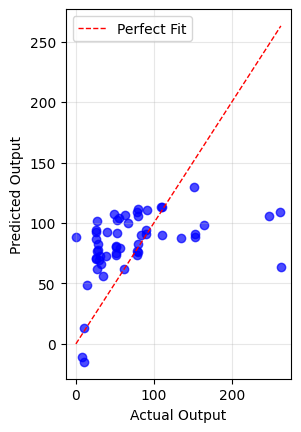

In [15]:
plt.subplot(1,2,1)
plt.scatter(Y_test, Y_test_pred_linear, color ='blue', alpha = 0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=1, label ='Perfect Fit')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.show()

## Poly visualize 

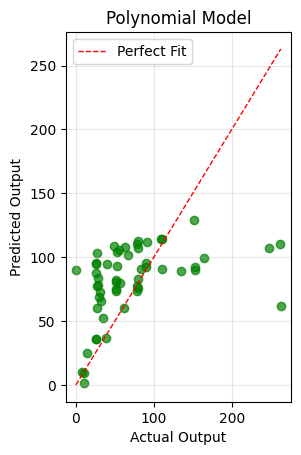

In [41]:
plt.subplot(1,2,1)
plt.scatter(Y_test, Y_test_pred_poly, color ='green', alpha = 0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=1, label ='Perfect Fit')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title("Polynomial Model")
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.show()

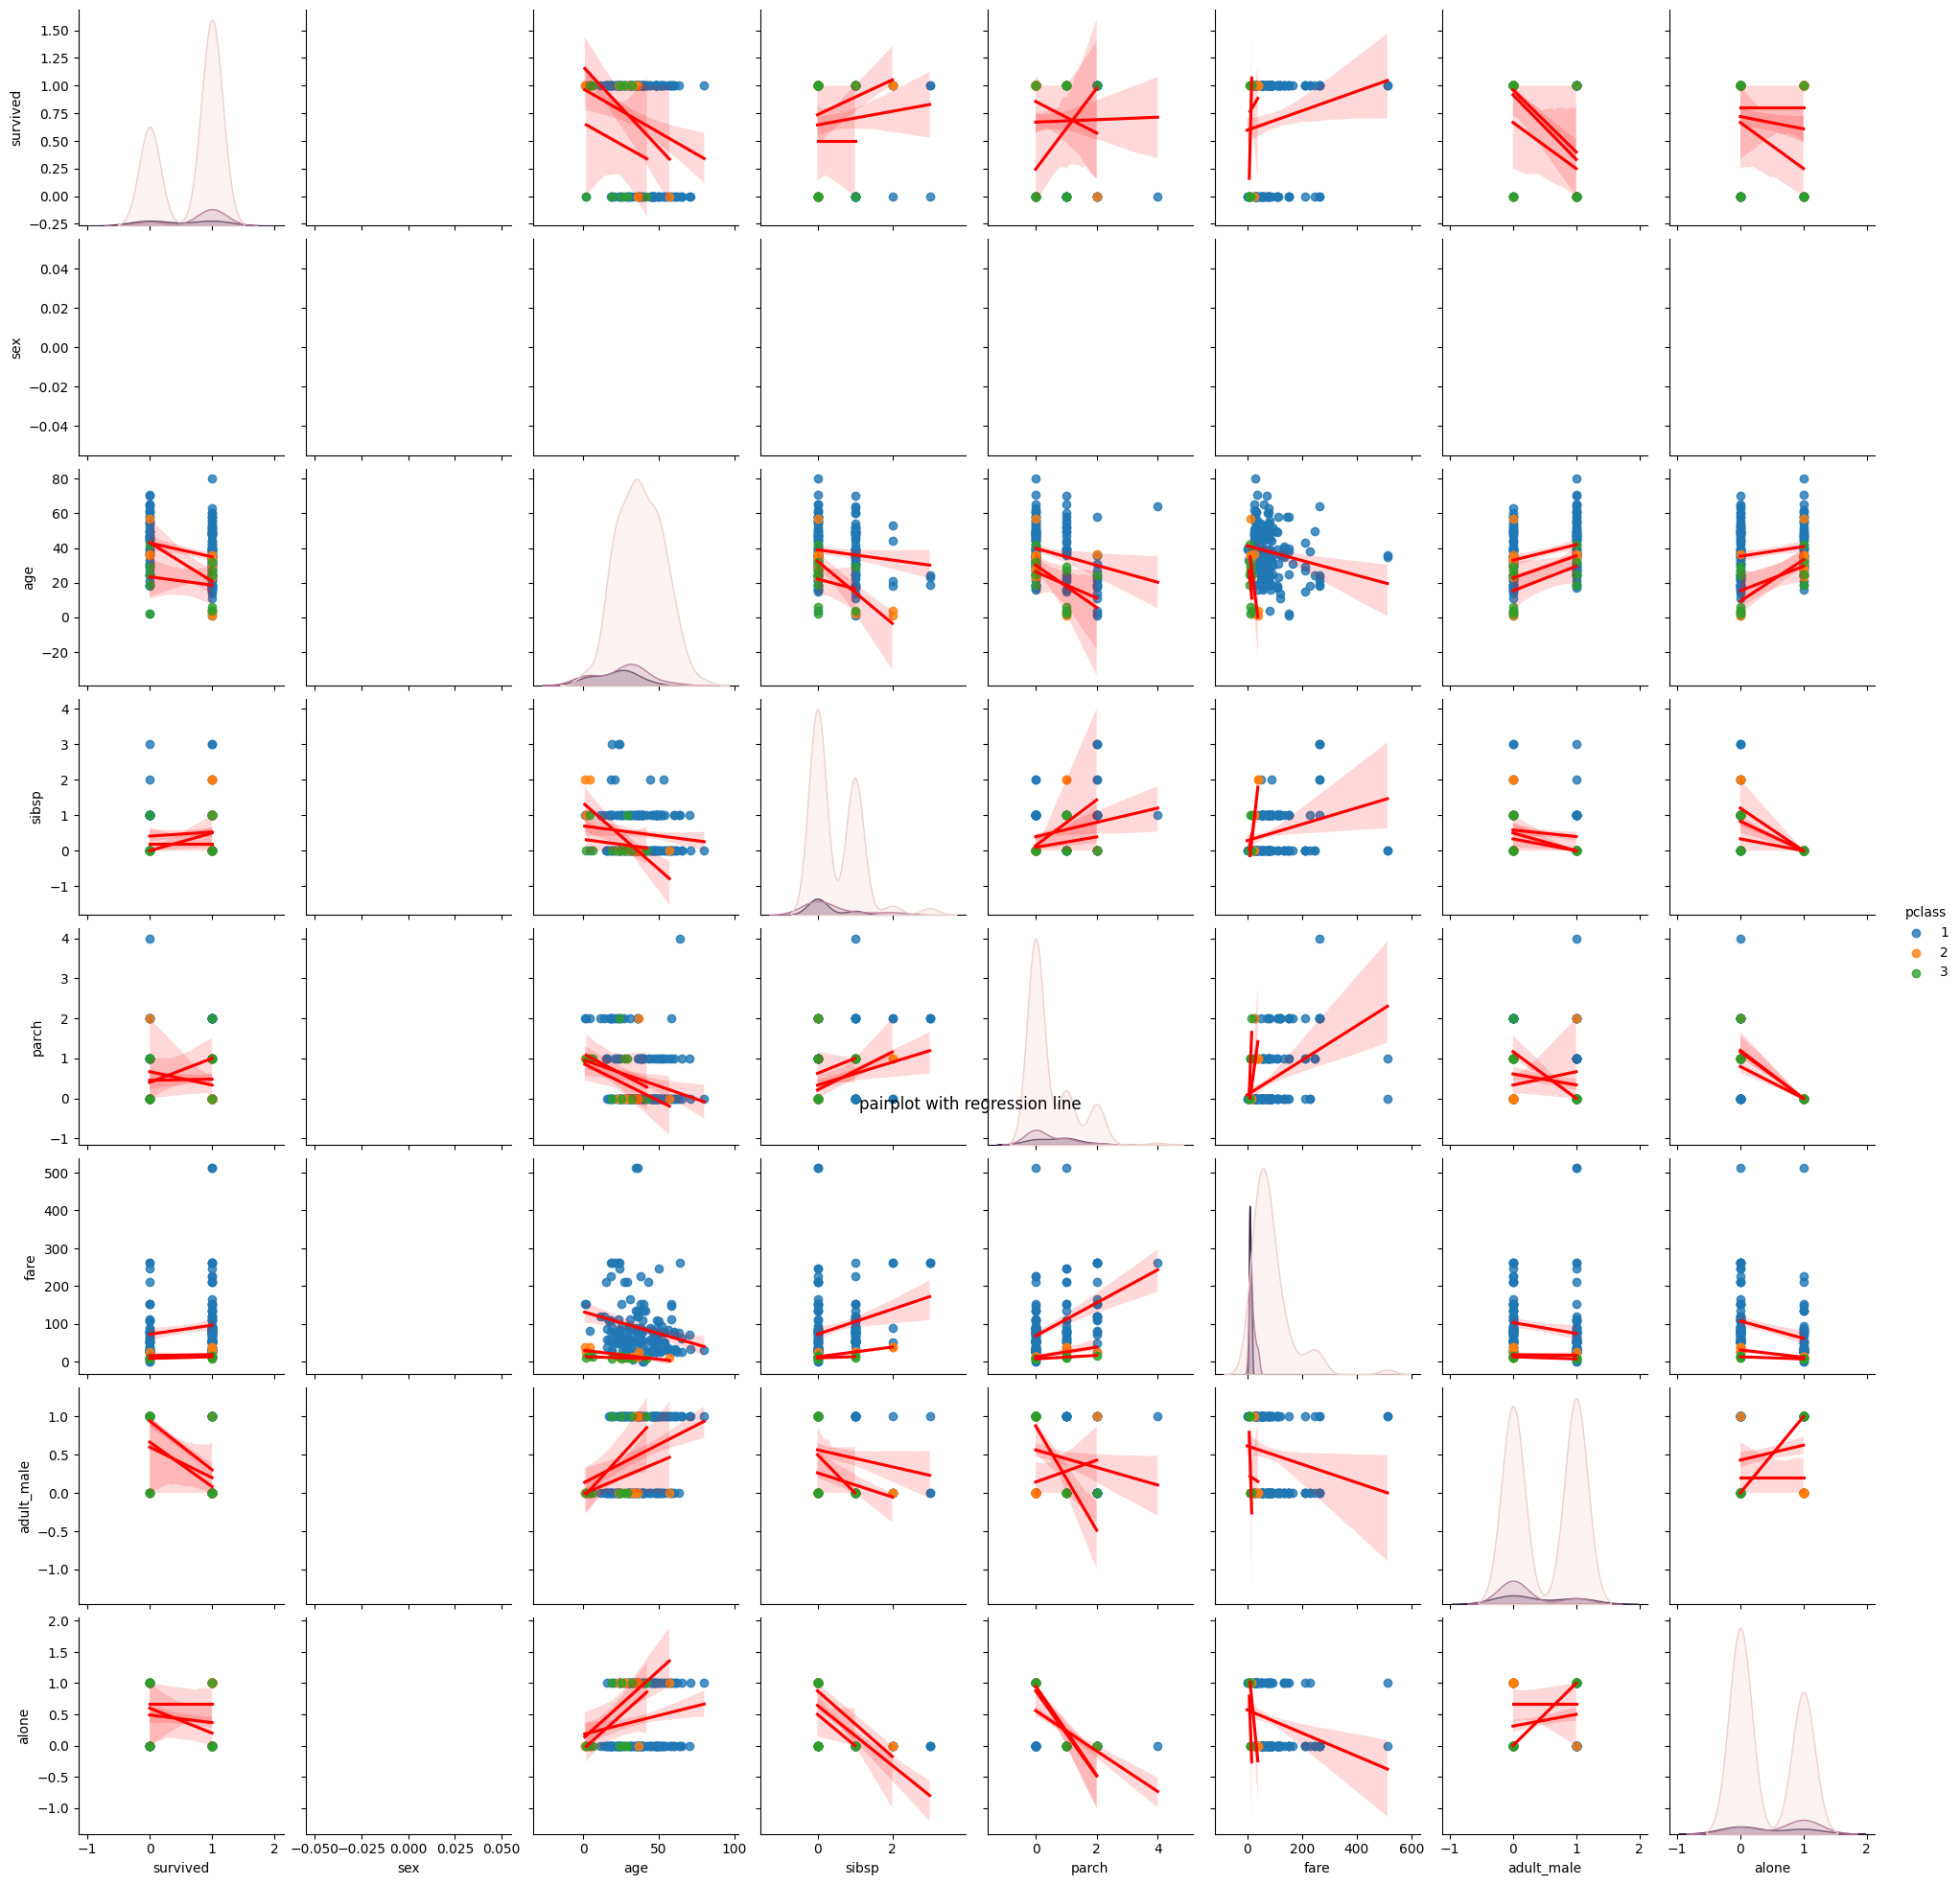

In [60]:
sns.pairplot(df, kind='reg', diag_kind='kde', hue='pclass', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle("pairplot with regression line", y = 0.42)
plt.show()

## Logistic Regression being Applied on Titanic here:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
X = df[['age', 'pclass']].values
Y = df['survived'].values

In [18]:
# Train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42) 

In [20]:
model = LogisticRegression()
model.fit(X,Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
Y_pred = model.predict(X_test)
#X_curve = np.linspace(X_test).reshape(-1,1)
Y_probs = model.predict_proba(X_test)[:,1].ravel()

In [31]:
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [32]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


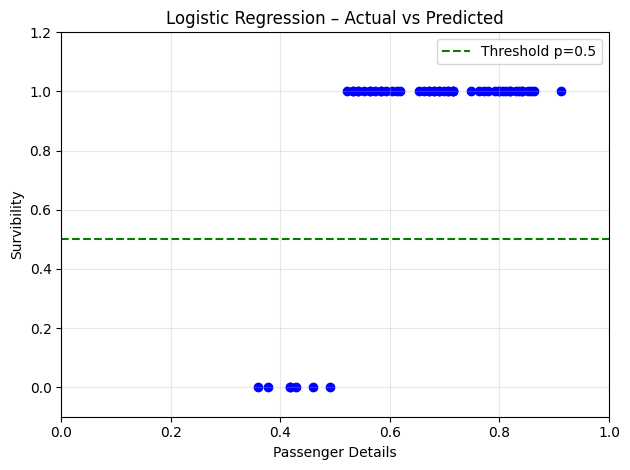

In [29]:
plt.scatter(Y_probs, Y_pred, color='Blue')
plt.axhline(y=0.5, color='green', linestyle='--',
            label='Threshold p=0.5')
plt.xlabel('Passenger Details')
plt.ylabel('Survibility')
plt.title('Logistic Regression – Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.2)
plt.xlim(0,1)
plt.tight_layout()
plt.show()


## KNN theory on Titanic Data sets 

In [33]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.neighbors import KNeighborsClassifier 
import warnings 
warnings.filterwarnings('ignore')
print("All Imported Successfully")

All Imported Successfully


In [34]:
# loading data set
df = sns.load_dataset('titanic')

In [35]:
print('dataset overview')
print(df.head())
print(df.shape)
print(f"Ages Distribution:\n {df['age'].value_counts()}")

dataset overview
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
(891, 15)
Ages Distribution:
 age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int6

In [36]:
df = df.dropna()

## Data Exploration 

<Figure size 2000x2000 with 0 Axes>

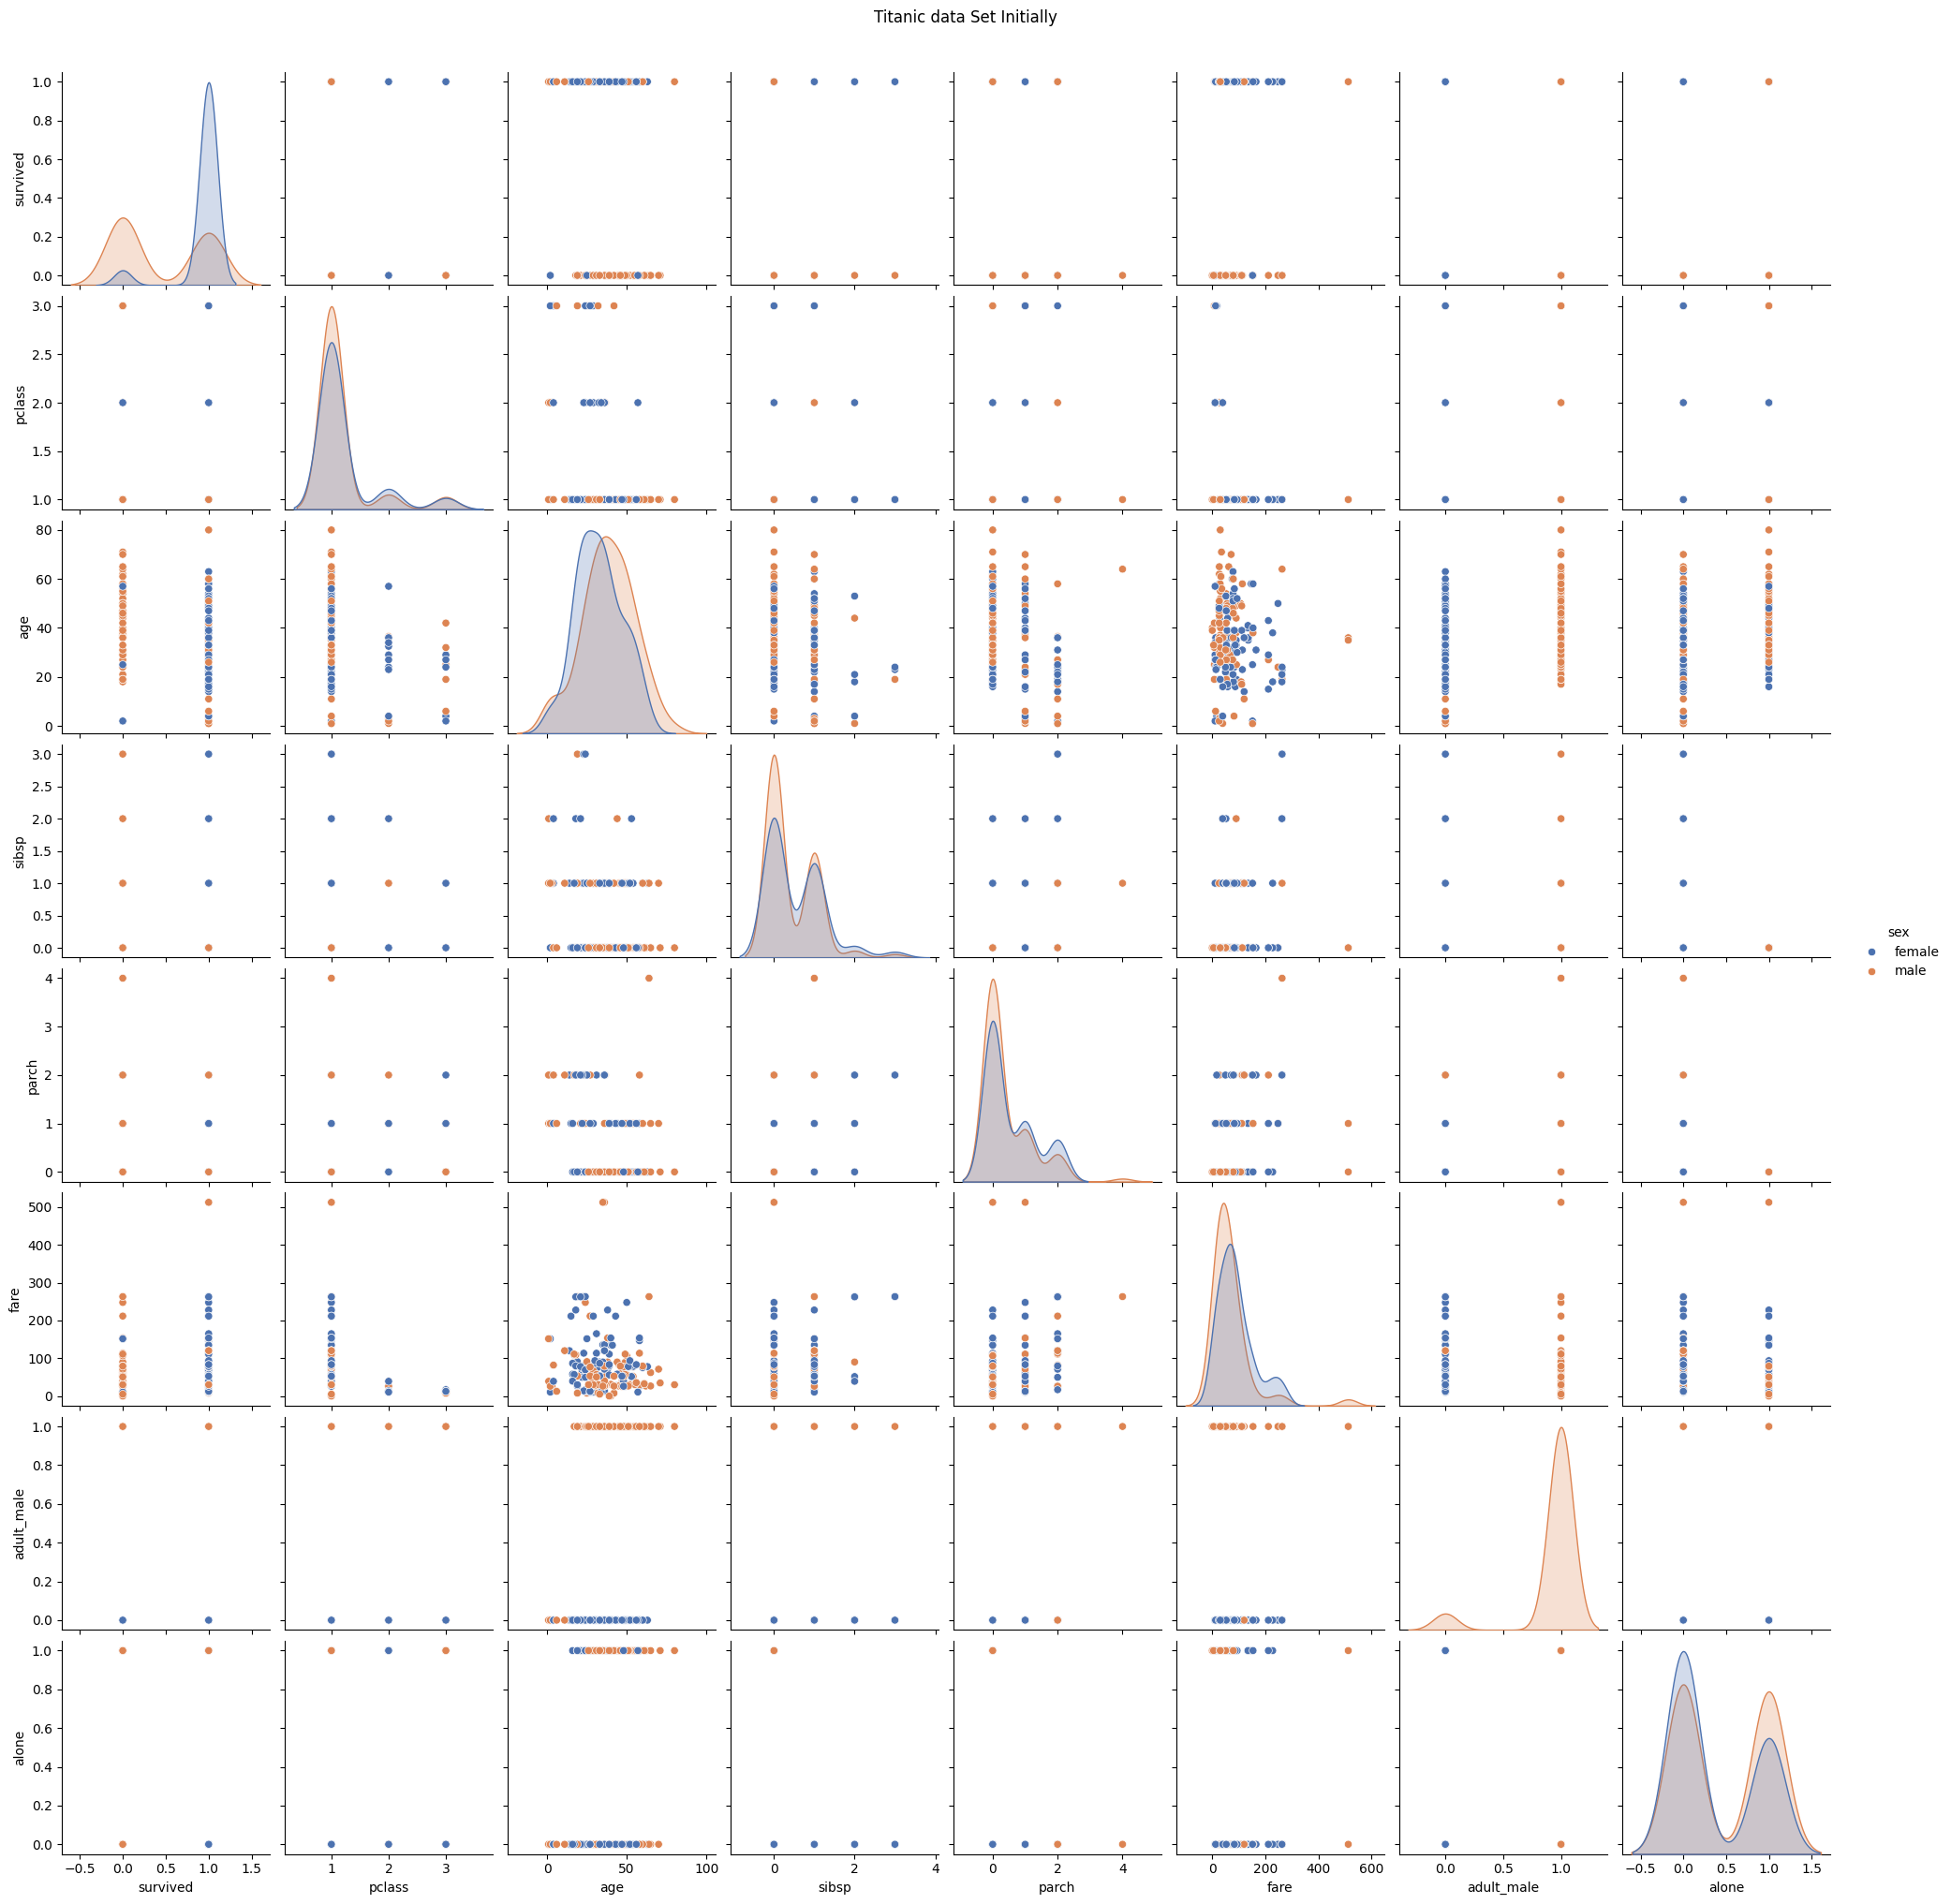

In [37]:
plt.figure(figsize = (20,20))
# pairplot
sns.pairplot(df, hue = 'sex', palette = 'deep')
plt.suptitle('Titanic data Set Initially', y=1.02)
plt.show()

In [38]:
## Split the data

In [39]:
X = df[['age', 'pclass']].values #feature
y = df['survived'].values #target
# y_encoded = y.map({0:'Death', 1:'Alive'}) #QA 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [44]:
# make the predictions
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [45]:
# Evaluate the model 
accuracy = accuracy_score(y_test, y_pred)
print(f"\n KNN Model Performance (k-3):")
print(f"Accuracy {accuracy:.4f}")


 KNN Model Performance (k-3):
Accuracy 0.6182


## Finding the optimal K most accuray

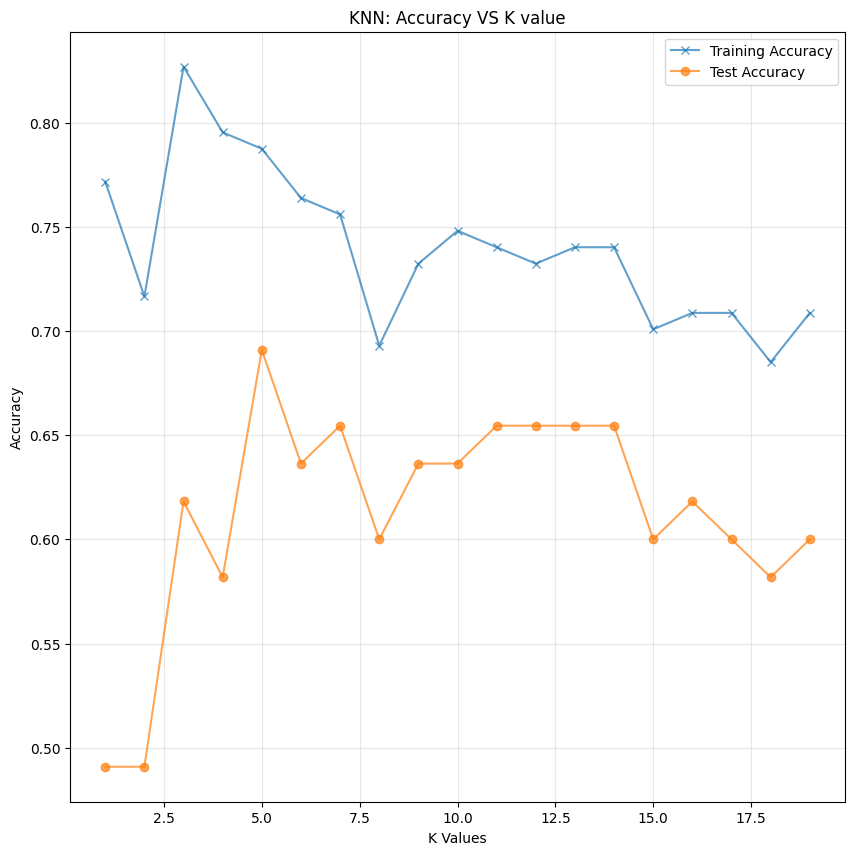

All test Scores: [0.4909090909090909, 0.4909090909090909, 0.6181818181818182, 0.5818181818181818, 0.6909090909090909, 0.6363636363636364, 0.6545454545454545, 0.6, 0.6363636363636364, 0.6363636363636364, 0.6545454545454545, 0.6545454545454545, 0.6545454545454545, 0.6545454545454545, 0.6, 0.6181818181818182, 0.6, 0.5818181818181818, 0.6]
 Optimal K value: 5 with the most accurary 0.6909


In [46]:
k_values = range(1,20)
train_score = []
test_score = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors =k)
    knn.fit(X_train, y_train)

    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

    
plt.figure(figsize=(10,10))
plt.plot(k_values, train_score, 'x-', label ='Training Accuracy', alpha=0.7)
plt.plot(k_values, test_score, 'o-', label ='Test Accuracy', alpha=0.7)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('KNN: Accuracy VS K value')
plt.show()
print(f"All test Scores: {test_score}")

#find the K the value that gives most accurary

optimal_k = k_values[np.argmax(test_score)]
print(f" Optimal K value: {optimal_k} with the most accurary {max(test_score):.4f}")

# Final model with Caculayed Optimal K value has most Accurary test Score!! 

In [47]:
optimal_knn = KNeighborsClassifier(n_neighbors=optimal_k)
optimal_knn.fit(X_train, y_train)

#final predictions
y_pred_opti = optimal_knn.predict(X_test)


In [48]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [49]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [50]:
df['pclass']

1      1
3      1
6      1
10     3
11     1
      ..
871    1
872    1
879    1
887    1
889    1
Name: pclass, Length: 182, dtype: int64

Example Predictions:

 Passenger 1 :
Predicted Survival: Died
Probabilities:
 Died : 0.8000


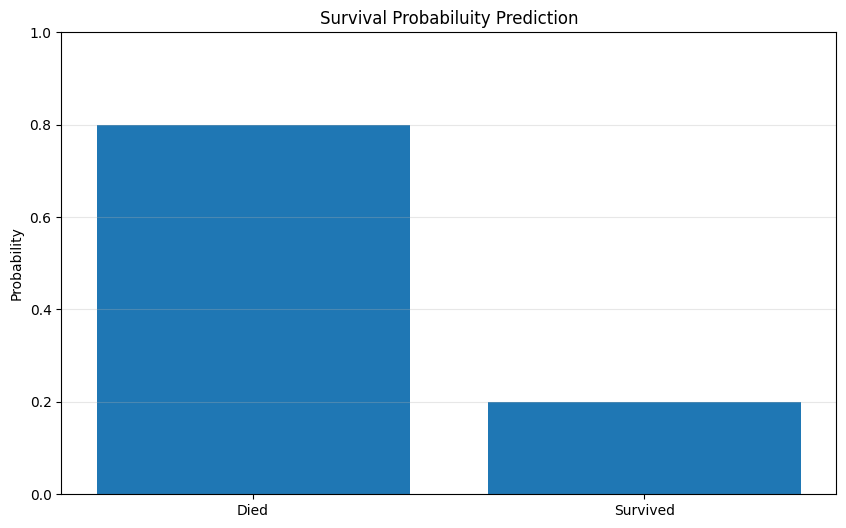

 Survived : 0.2000


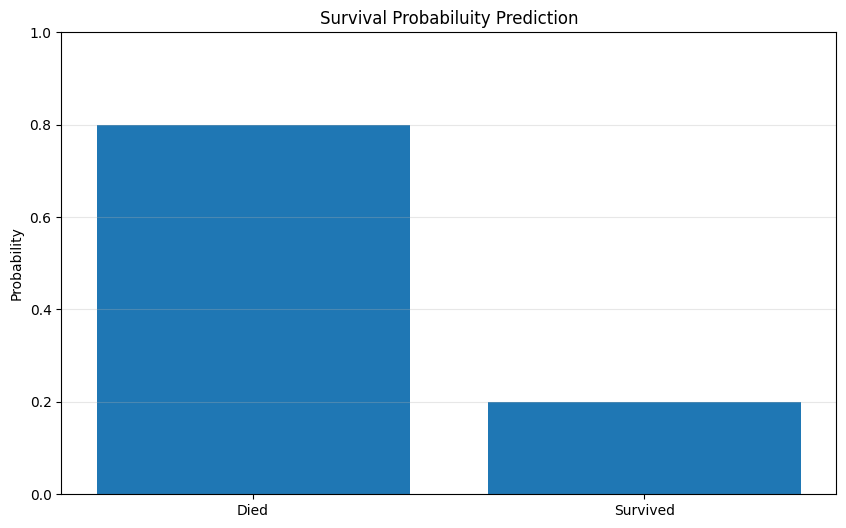


 Passenger 2 :
Predicted Survival: Survived
Probabilities:
 Died : 0.2000


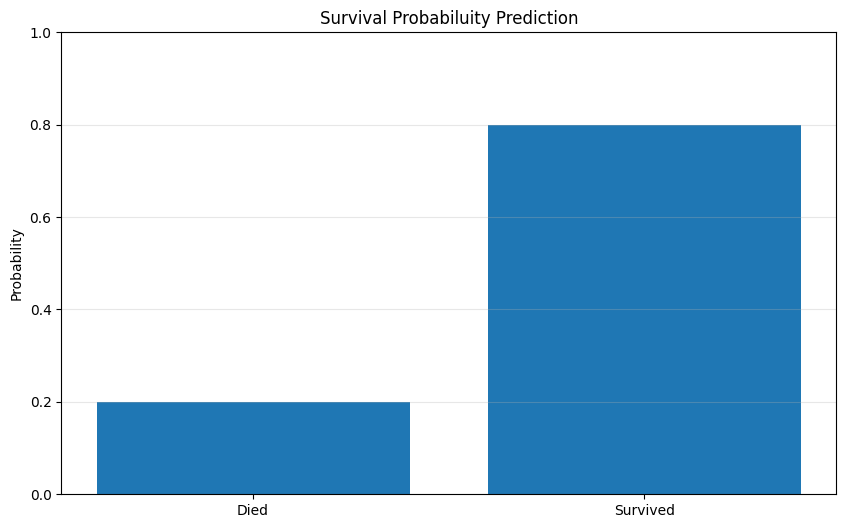

 Survived : 0.8000


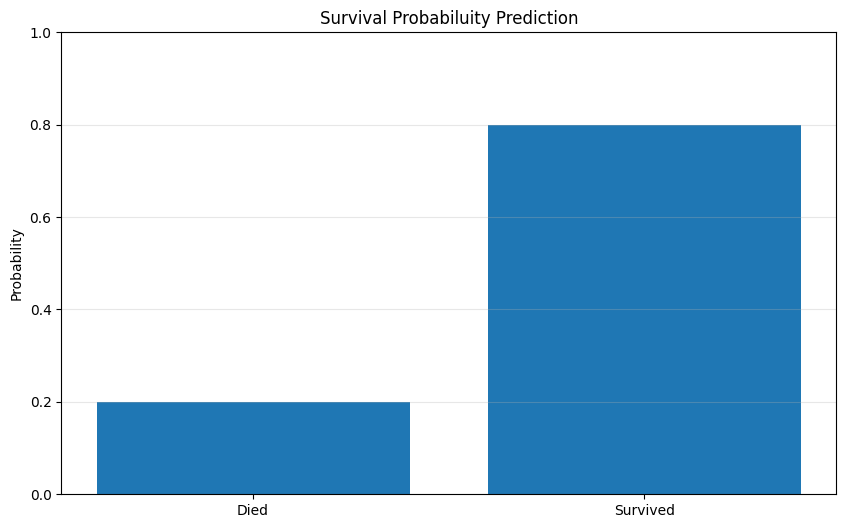


 Passenger 3 :
Predicted Survival: Died
Probabilities:
 Died : 0.6000


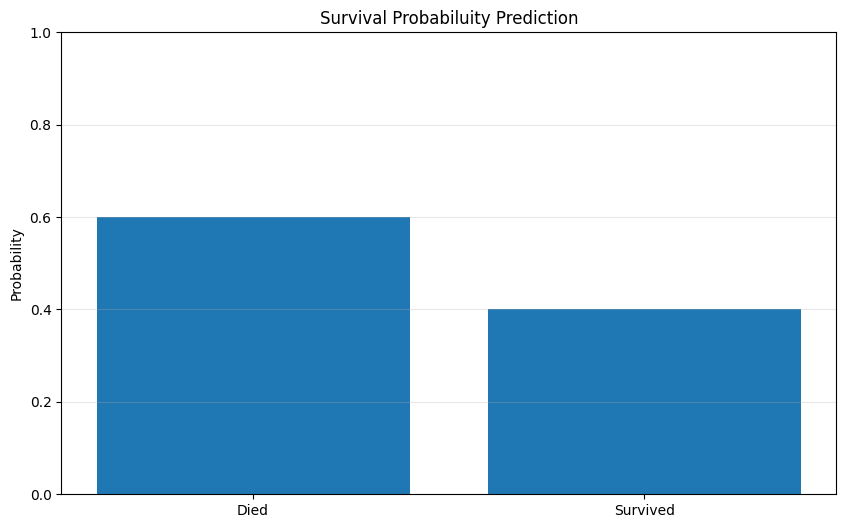

 Survived : 0.4000


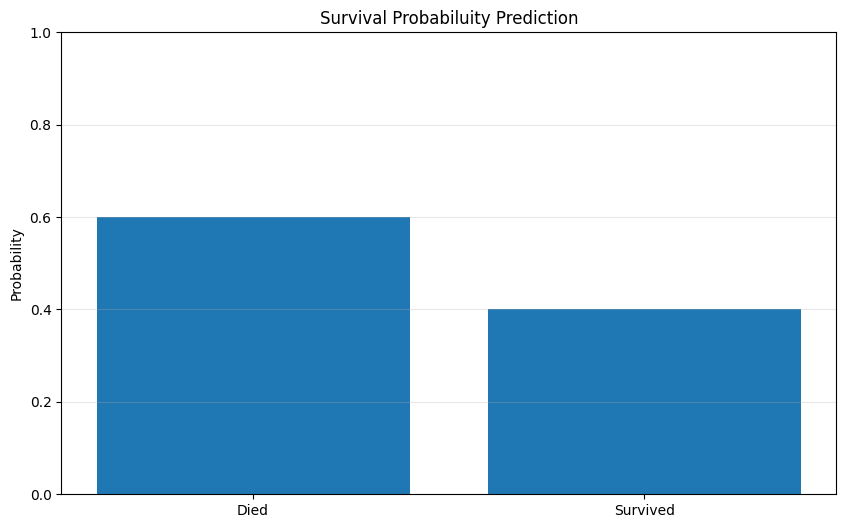

'Died'

In [70]:
def predict_new_survival(age, pclass):
    new_passenger = np.array([[age, pclass]])
    prediction = optimal_knn.predict(new_passenger)
    probability = optimal_knn.predict_proba(new_passenger)[0]

    label_map = {0: "Died", 1: "Survived"}
    survival_label = label_map[prediction[0]]

    print(f"Predicted Survival: {survival_label}")
    print("Probabilities:")

    for cls, prob in enumerate(probability):
        print(f" {label_map[cls]} : {prob:.4f}")

        # Visualize
        classes = list(label_map.values())
        probs = probability

        plt.figure(figsize=(10,6))
        plt.bar(classes, probs)
        plt.title("Survival Probabiluity Prediction")
        plt.ylabel("Probability")
        plt.ylim(0,1)
        plt.grid(axis='y', alpha=0.3)
        plt.show()
        
    return survival_label


# survival prediction:
print("Example Predictions:")
print("\n Passenger 1 :")
predict_new_survival(20.0, 3)

print("\n Passenger 2 :")
predict_new_survival(35.0, 1)

print("\n Passenger 3 :")
predict_new_survival(65.0, 2)
